# CIFAR10_model
## 10개의 이미지 클래스를 가지고 데이터들을 분류하는 모델을 만들어 보자!


## 1. 데이터 로드 및 전처리

In [1]:
# import
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(train_data, train_labels), (x_test, y_test) = cifar10.load_data()

x_train_full, y_train_full = train_data, train_labels

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.2, random_state=2023)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
# class name

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

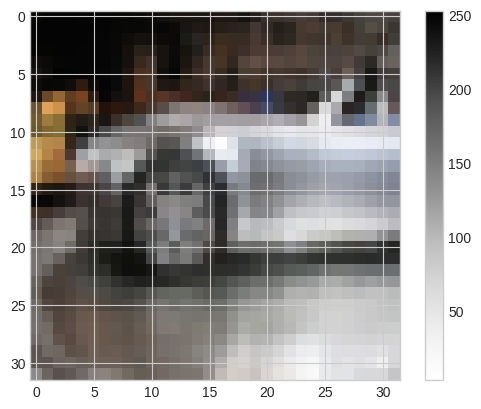

In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
# x_train = x_train.reshape(x_train.shape[0], 32 * 32 * 3)
# x_val = x_val.reshape(x_val.shape[0], 32 * 32 * 3)
# x_test = x_test.reshape(x_test.shape[0], 32 * 32 * 3)

# Cov, maxPooling 사용하기 위해 reshape (Sequential API 방식)
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_val = x_val.reshape(x_val.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)


print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
# 표준화, 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 2. 모델 구성 및 컴파일

In [8]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# 스스로 CNN 기법을 넣어 봤음
# L2 규제 적용
# lr(학습률) 적용
# [[YOUR CODE]]
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

# Flatten layer
model.add(Flatten())

# Dense layer
model.add(Dense(1024, activation='relu',kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

# 모델 컴파일 (lr 조정 추가)
model.compile(optimizer=Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 구조 출력
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,218 (649.29 KB)

 Trainable params: 163,978 (640.54 KB)

 Non-trainable params: 2,240 (8.75 KB)

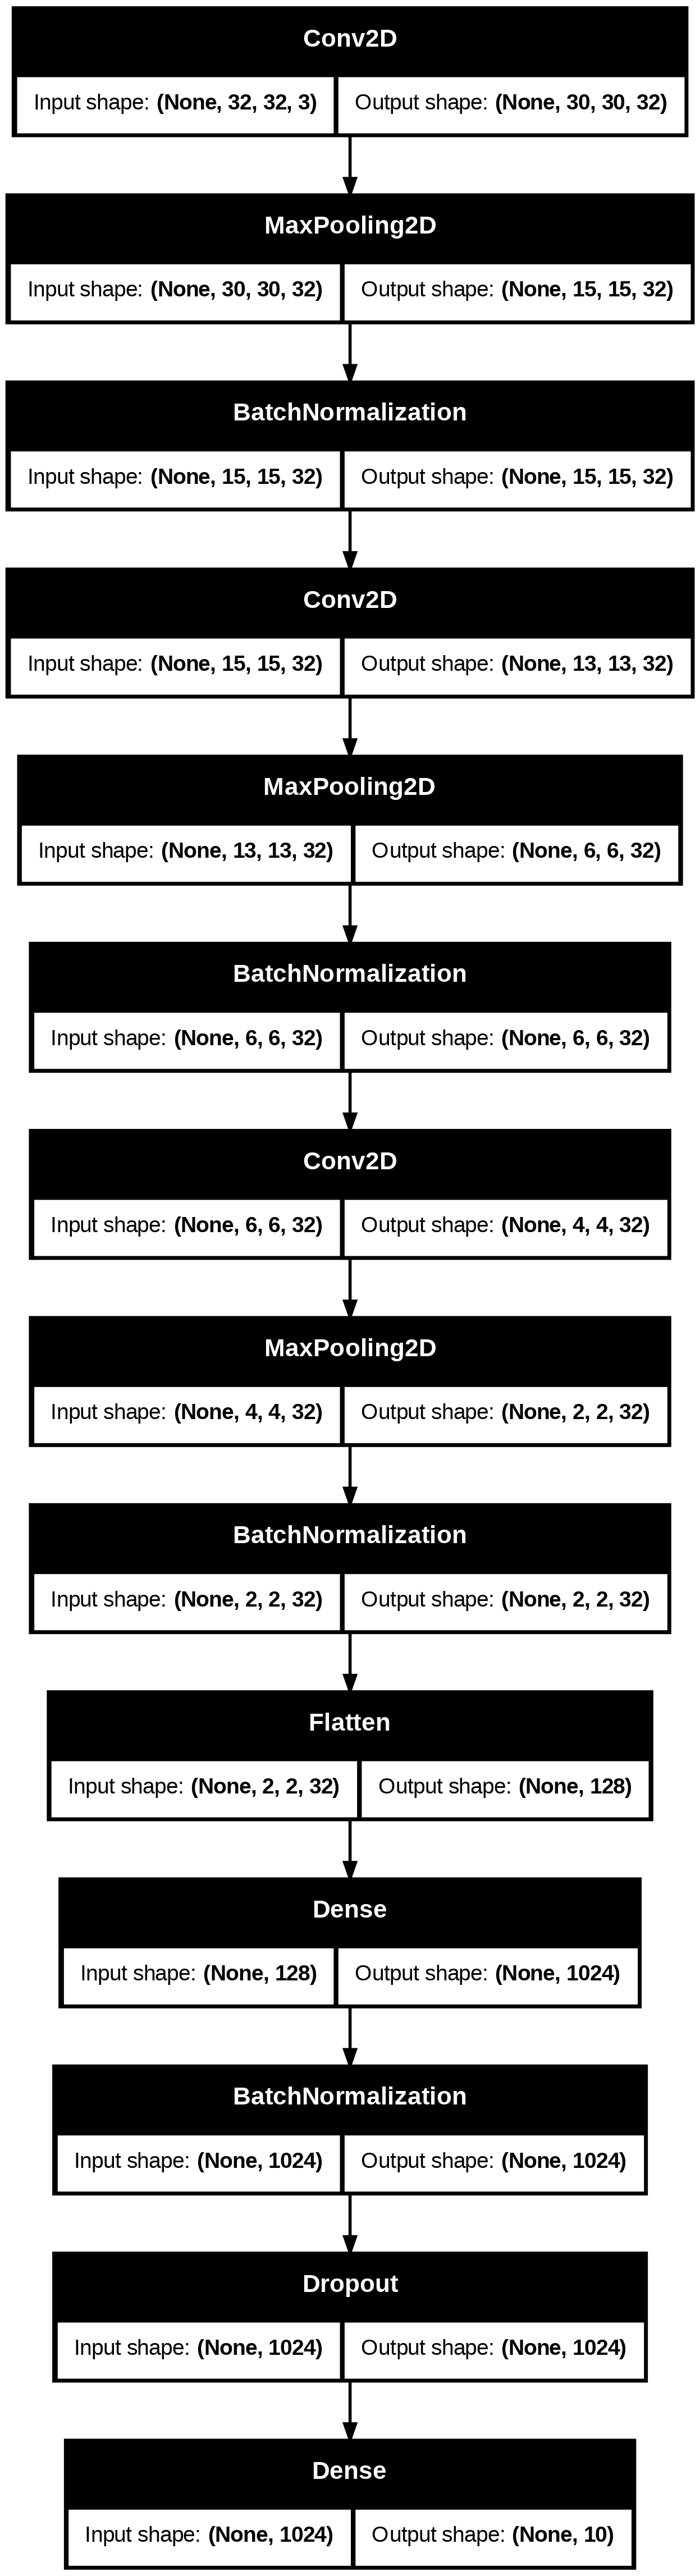

In [9]:
# Check model shape
plot_model(model, show_shapes=True)

## 3. 모델 학습

In [10]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

model_checkpoint = ModelCheckpoint("best_model.h5",
                                   save_best_only=True,
                                   monitor='val_loss',
                                   verbose=1)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               verbose=1)

# Learning rate 조절 함수
def lr_scheduler(epoch, lr):
    if epoch % 5 == 0 and epoch > 0:
        lr = lr * 0.3  # 5번째 에폭마다 학습률을 절반씩 감소, 30% 감소로 last 진행
    return lr

learning_rate_scheduler = LearningRateScheduler(lr_scheduler)

# model fit
history = model.fit(x_train, y_train, epochs=30, # last로 lr과 변경 (20 > 30)
                    batch_size=64,
                    validation_data = (x_val, y_val),
                    callbacks=[model_checkpoint, early_stopping,learning_rate_scheduler])
print("모델 학습이 완료되었습니다.")

Epoch 1/30
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3489 - loss: 3.4946
Epoch 1: val_loss improved from inf to 2.08311, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.3495 - loss: 3.4856 - val_accuracy: 0.4844 - val_loss: 2.0831 - learning_rate: 0.0050
Epoch 2/30
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5165 - loss: 1.9246
Epoch 2: val_loss improved from 2.08311 to 1.90225, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5167 - loss: 1.9231 - val_accuracy: 0.4766 - val_loss: 1.9023 - learning_rate: 0.0050
Epoch 3/30
614/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5797 - loss: 1.5078
Epoch 3: val_loss improved from 1.90225 to 1.65606, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5798 - loss: 1.5073 - val_accuracy: 0.5314 - val_loss: 1.6561 - learning_rate: 0.0050
Epoch 4/30
616/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6054 - loss: 1.3960
Epoch 4: val_loss improved from 1.65606 to 1.50205, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6054 - loss: 1.3958 - val_accuracy: 0.5660 - val_loss: 1.5021 - learning_rate: 0.0050
Epoch 5/30
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6263 - loss: 1.3062
Epoch 5: val_loss improved from 1.50205 to 1.47362, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6263 - loss: 1.3062 - val_accuracy: 0.5651 - val_loss: 1.4736 - learning_rate: 0.0050
Epoch 6/30
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6784 - loss: 1.0683
Epoch 6: val_loss improved from 1.47362 to 1.09198, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6785 - loss: 1.0679 - val_accuracy: 0.6563 - val_loss: 1.0920 - learning_rate: 0.0015
Epoch 7/30
617/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7019 - loss: 0.9714
Epoch 7: val_loss improved from 1.09198 to 1.01498, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7019 - loss: 0.9714 - val_accuracy: 0.6794 - val_loss: 1.0150 - learning_rate: 0.0015
Epoch 8/30
615/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7067 - loss: 0.9482
Epoch 8: val_loss did not improve from 1.01498
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7067 - loss: 0.9482 - val_accuracy: 0.6818 - val_loss: 1.0202 - learning_rate: 0.0015
Epoch 9/30
614/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7180 - loss: 0.9231
Epoch 9: val_loss did not improve from 1.01498
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7180 - loss: 0.9232 - val_accuracy: 0.6599 - val_loss: 1.0989 - learning_rate: 0.0015
Epoch 10/30
613/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7294 - loss: 0.8940
Epoch 10: val_loss improved from 1.01498 to 1.00176, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7292 - loss: 0.8942 - val_accuracy: 0.6838 - val_loss: 1.0018 - learning_rate: 0.0015
Epoch 11/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7567 - loss: 0.8005
Epoch 11: val_loss improved from 1.00176 to 0.87226, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7567 - loss: 0.8005 - val_accuracy: 0.7170 - val_loss: 0.8723 - learning_rate: 4.5000e-04
Epoch 12/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7650 - loss: 0.7465
Epoch 12: val_loss improved from 0.87226 to 0.86267, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7650 - loss: 0.7465 - val_accuracy: 0.7203 - val_loss: 0.8627 - learning_rate: 4.5000e-04
Epoch 13/30
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7661 - loss: 0.7274
Epoch 13: val_loss did not improve from 0.86267
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7661 - loss: 0.7275 - val_accuracy: 0.7137 - val_loss: 0.8881 - learning_rate: 4.5000e-04
Epoch 14/30
617/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7757 - loss: 0.7033
Epoch 14: val_loss did not improve from 0.86267
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7756 - loss: 0.7036 - val_accuracy: 0.7149 - val_loss: 0.8928 - learning_rate: 4.5000e-04
Epoch 15/30
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7757 - loss: 0.7019
Epoch 15: val_loss did not improve from 0.86267
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7756 - loss: 0.7020 - val_accuracy: 0.7154 - val_loss: 0.8842 - learning_rate: 4.5000e-04
Epoch 16/30
618

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7903 - loss: 0.6623 - val_accuracy: 0.7250 - val_loss: 0.8533 - learning_rate: 1.3500e-04
Epoch 17/30
614/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7949 - loss: 0.6371
Epoch 17: val_loss improved from 0.85329 to 0.85016, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7949 - loss: 0.6373 - val_accuracy: 0.7261 - val_loss: 0.8502 - learning_rate: 1.3500e-04
Epoch 18/30
617/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8023 - loss: 0.6242
Epoch 18: val_loss improved from 0.85016 to 0.84549, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8022 - loss: 0.6243 - val_accuracy: 0.7275 - val_loss: 0.8455 - learning_rate: 1.3500e-04
Epoch 19/30
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8022 - loss: 0.6069
Epoch 19: val_loss improved from 0.84549 to 0.83892, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8021 - loss: 0.6072 - val_accuracy: 0.7293 - val_loss: 0.8389 - learning_rate: 1.3500e-04
Epoch 20/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8027 - loss: 0.6127
Epoch 20: val_loss did not improve from 0.83892
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8027 - loss: 0.6127 - val_accuracy: 0.7278 - val_loss: 0.8417 - learning_rate: 1.3500e-04
Epoch 21/30
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8065 - loss: 0.5962
Epoch 21: val_loss improved from 0.83892 to 0.83821, saving model to best_model.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8065 - loss: 0.5962 - val_accuracy: 0.7272 - val_loss: 0.8382 - learning_rate: 4.0500e-05
Epoch 22/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8090 - loss: 0.5903
Epoch 22: val_loss did not improve from 0.83821
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8090 - loss: 0.5903 - val_accuracy: 0.7298 - val_loss: 0.8394 - learning_rate: 4.0500e-05
Epoch 23/30
614/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8096 - loss: 0.5848
Epoch 23: val_loss did not improve from 0.83821
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8096 - loss: 0.5848 - val_accuracy: 0.7291 - val_loss: 0.8382 - learning_rate: 4.0500e-05
Epoch 24/30
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8128 - loss: 0.5772
Epoch 24: val_loss did not improve from 0.83821
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8128 - loss: 0.5773 - val_accuracy: 0.7281 - val_loss: 0.8392 - learning_rate: 4.0500e-05
Epoch 25/30
622

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8113 - loss: 0.5769 - val_accuracy: 0.7293 - val_loss: 0.8357 - learning_rate: 1.2150e-05
Epoch 27/30
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8138 - loss: 0.5742
Epoch 27: val_loss did not improve from 0.83570
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8138 - loss: 0.5742 - val_accuracy: 0.7296 - val_loss: 0.8364 - learning_rate: 1.2150e-05
Epoch 28/30
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8170 - loss: 0.5649
Epoch 28: val_loss did not improve from 0.83570
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8170 - loss: 0.5650 - val_accuracy: 0.7293 - val_loss: 0.8364 - learning_rate: 1.2150e-05
Epoch 29/30
619/625 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8161 - loss: 0.5636
Epoch 29: val_loss did not improve from 0.83570
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8160 - loss: 0.5637 - val_accuracy: 0.7302 - val_loss: 0.8368 - learning_rate: 1.2150e-05
Epoch 30/30
624

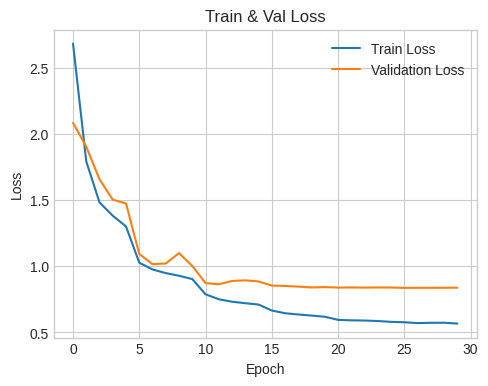

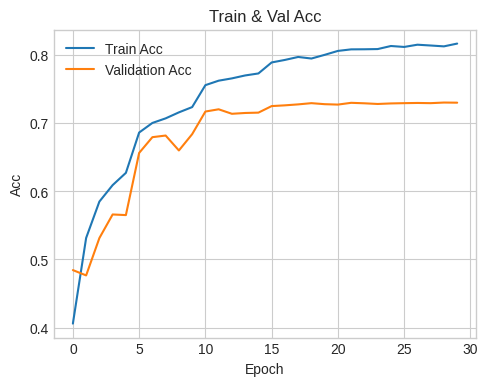

In [11]:
# 시각화
# history 에서 loss와 val_loss 추출
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# history 에서 acc 와 val_acc 추출
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss Graph
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Train & Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# acc Graph
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(train_acc, label='Train Acc')
plt.plot(val_acc, label='Validation Acc')
plt.legend()
plt.title('Train & Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')

plt.show()

## 4. 모델 평가 및 예측

In [12]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
# 앞 전에 최적화 방법으로는 layer, 뉴런 조절, dropout, batch normalization, lr, 규제 설정
# 좀 더 학습을 위해 데이터 증강 (datagen 활용!)
# Lr에 따라 변화가 가장 크다 (Lr 스케쥴러 사용 해보자!)
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7290 - loss: 0.8283


[0.8377929925918579, 0.729200005531311]

In [5]:
!git commit -m '현우님 코드'
!git push

[main ddabfe6] 현우님 코드 복사(학습용)
 1 file changed, 1 insertion(+)
 create mode 100644 CIFAR10_model.ipynb
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 306.88 KiB | 5.20 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/chang0920/ted_CIFAR10.git
   980a83f..ddabfe6  main -> main
